In [4]:
import pandas as pd

In [5]:
housing = pd.read_csv('../Data/housing.csv')

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#It gives the total count of each field and data typesabs
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#It will give you value counts of each tyoe of data inside a column
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
#It will give the summary of the numerical attributes of the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#With this data you cant understand so much about the dataset thats why we will convert it into a graph

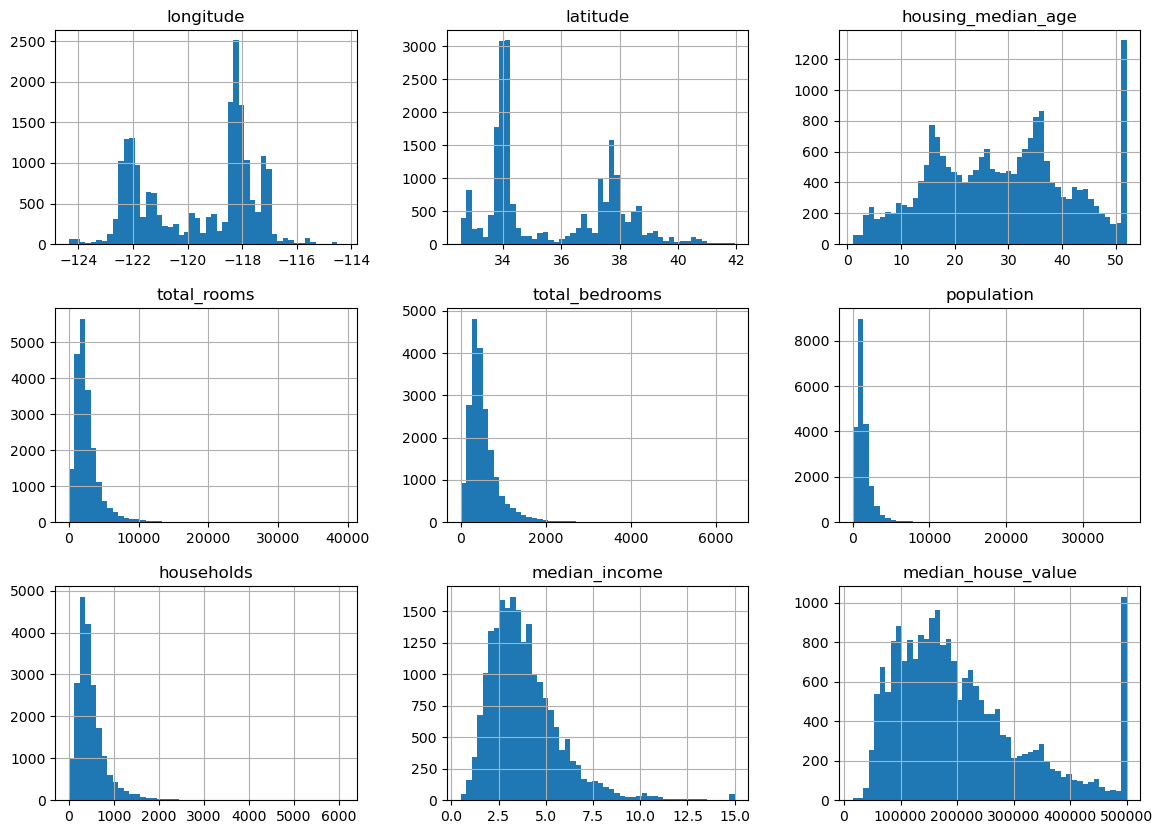

In [11]:
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize = (14,10))
plt.show()

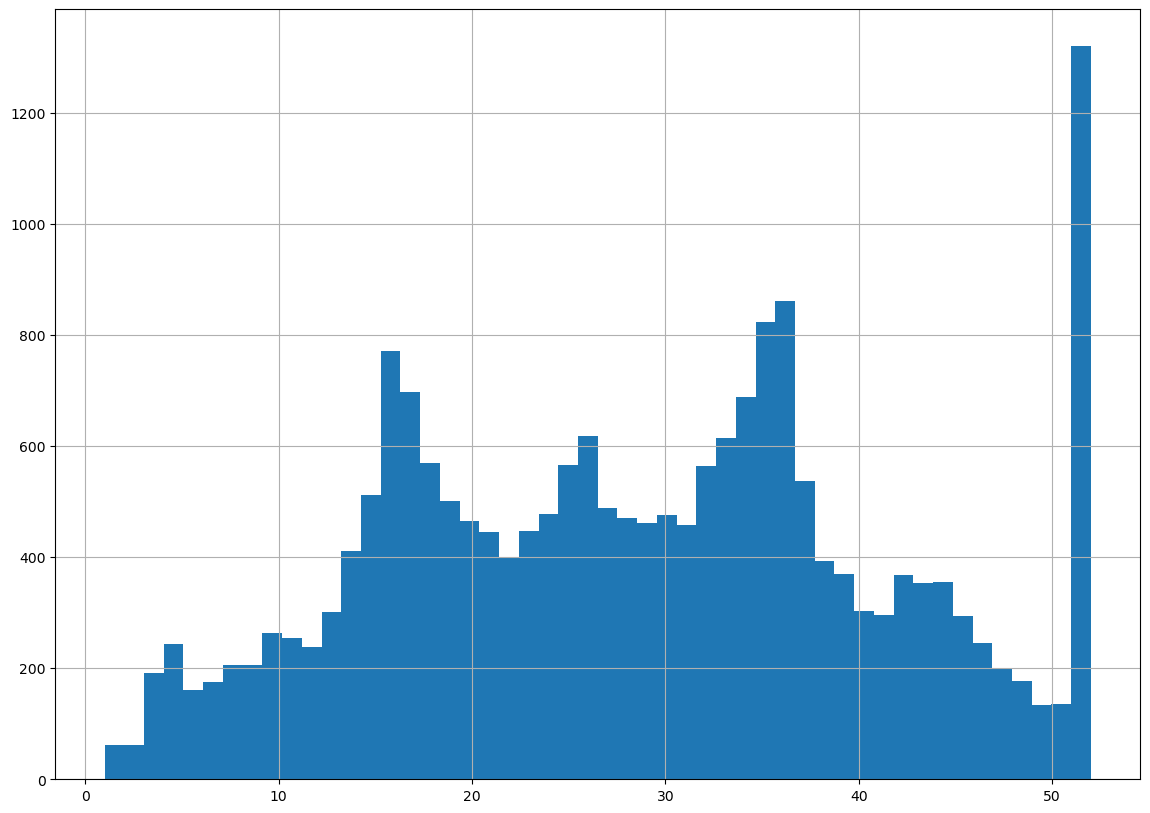

In [12]:
housing['housing_median_age'].hist(bins = 50,figsize = (14,10))
plt.show()

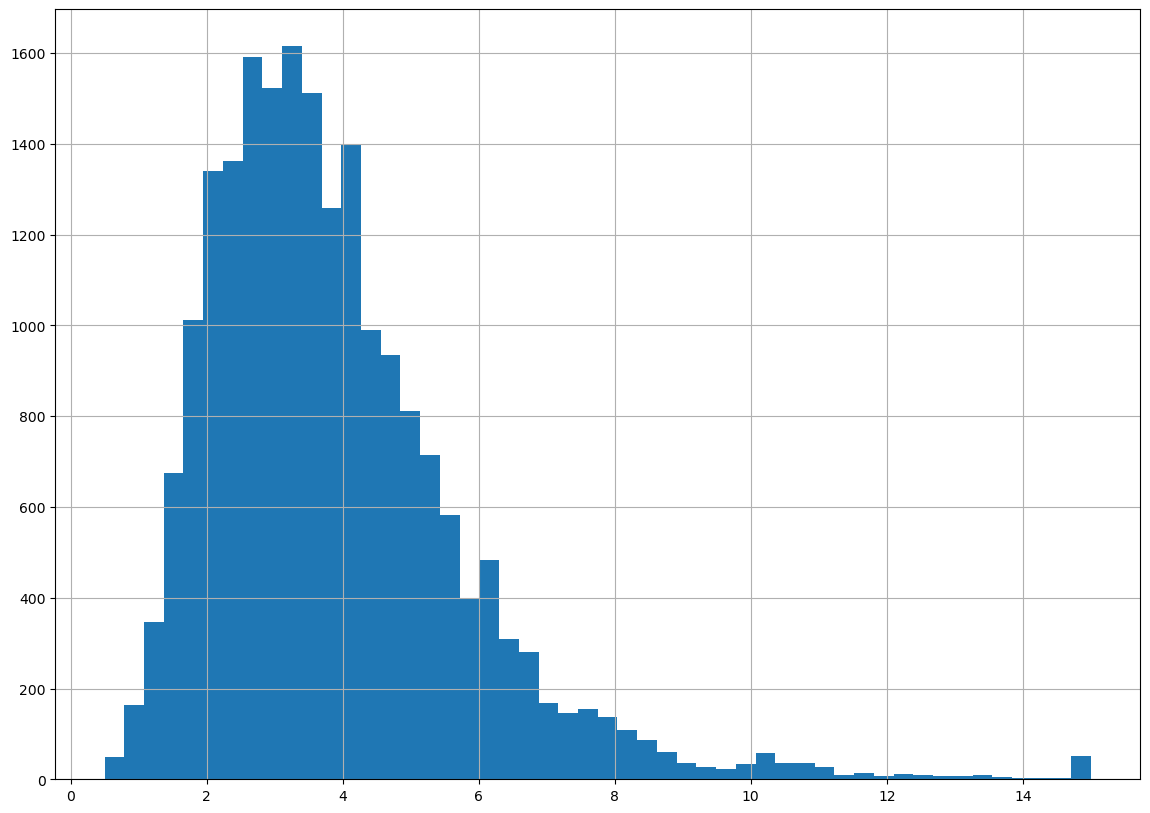

In [13]:
housing['median_income'].hist(bins = 50,figsize = (14,10))
plt.show()

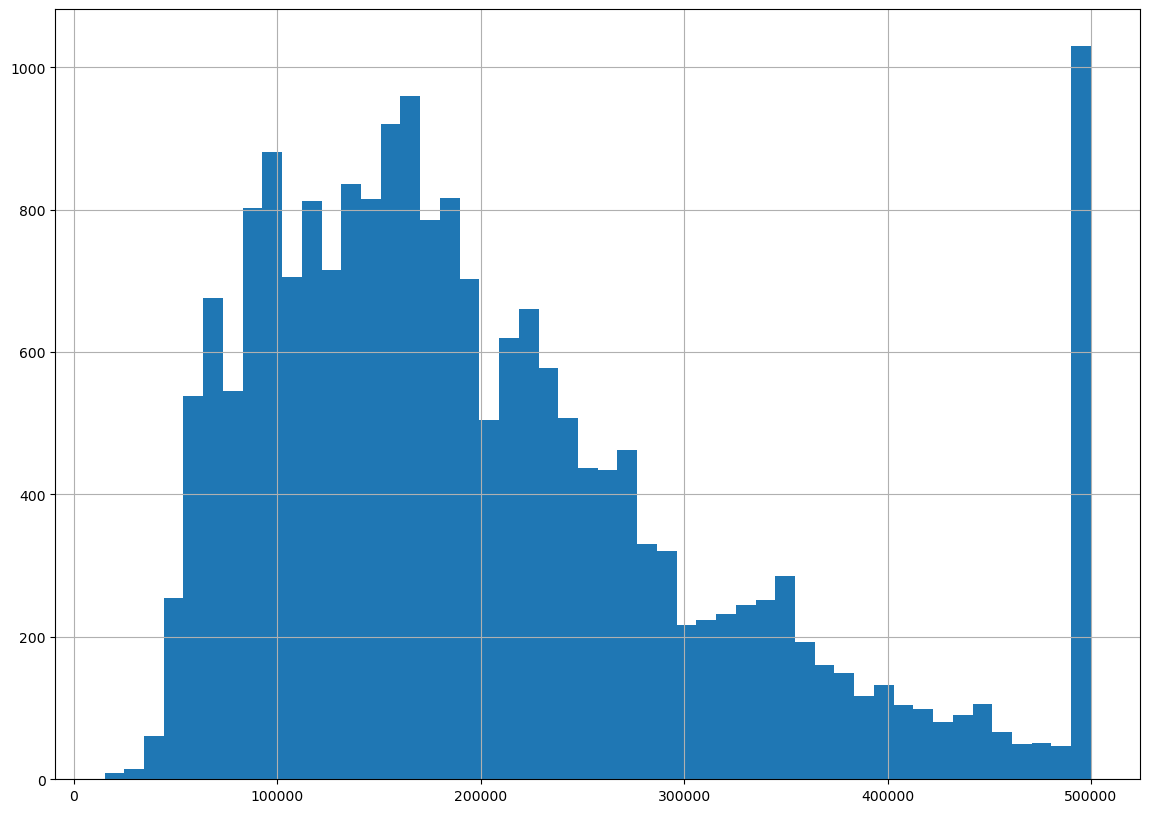

In [14]:
housing['median_house_value'].hist(bins = 50,figsize = (14,10))
plt.show()

In [15]:
#To implement Ml algorithm we should have a set of train and test through which we can train the model and than test later on

In [18]:
#This is the most basic way to split for test and train
import numpy as np
def split_test_and_train(data,test_ratio):
    #It will create a series of random number of 
    shuffle_indices = np.random.permutation(len(data))
    #It will gget the number of data we will take for testing purpose depends upon ratio and the length of the dataeset
    test_size = int(len(data) * test_ratio)
    #This variable will take the indices from shuffle indices seroies based upon the test ratio
    test_indices = shuffle_indices[:test_size]
    #This variable will take the indices for train from shuffle indices series based upon the test ratio
    train_indices = shuffle_indices[test_size:]
    #Return the value for test and train
    return data.iloc[train_indices],data.iloc[test_indices]
                    

In [19]:
train_set,test_set = split_test_and_train(housing,0.2)

In [22]:
len(train_set)

16512

In [23]:
len(test_set)

4128

In [24]:
#This is not an deal way to split data as every time you run the program a new set of train and test data will be there

In [33]:
housing = housing.reset_index(drop=False)

In [34]:
#For that reson we will try another method i.e using hash function . 
#We will it use it because it works on the index of the dataset so when you add a new data it will be stable 

In [42]:
from zlib import crc32
def is_id_in_the_test_set(identifier, test_ratio):
    # Convert id into 64-bit integer and check if it's in the test set
    return crc32(np.int64(identifier)) < test_ratio * 2**32

In [43]:
def split_data_with_id(data, id_column, test_ratio):
    #Making a series of ll the ids from id column
    ids = data[id_column]
    #Checking the ids suing hash
    in_test_set = ids.apply(lambda id_: is_id_in_the_test_set(id_, test_ratio))
    #Returning whether its in in_the_test or not
    return data.loc[~in_test_set], data.loc[in_test_set]

In [44]:
train_set, test_set = split_data_with_id(housing, "index", 0.2)

In [45]:
#This is also a good algo for splitting for testing and training data but you dont know that from where it has taken the test and training.But
#in Ml the model should have sample from every kind of ata for better output thats why the test and train set should have stratifed data

In [46]:
#In this datset we came to know that median_income is important atrribute for predict median_housing_prie

In [47]:
#Let us convert the median_income into a category

In [48]:
housing["median_income"].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [50]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

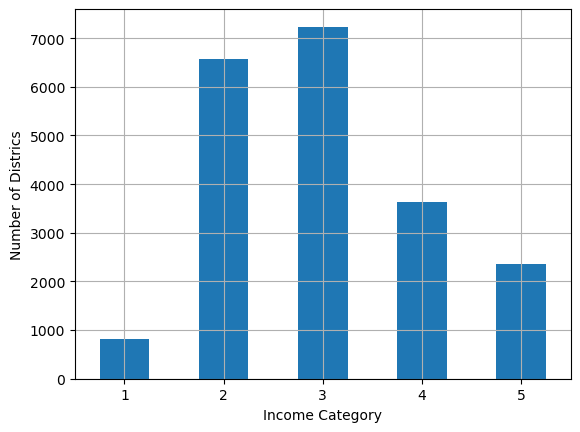

In [58]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districs")
plt.show()

In [59]:
#Se we can see different categories of income ovber here

In [60]:
#Now we can split the data using stratification of income

In [62]:
from sklearn.model_selection import train_test_split

In [68]:
#Here we are using train_test_split from sklearn.model_selection to split the data in train and test 
strat_train_set,strat_test_set = train_test_split(housing,test_size = 0.2, stratify = housing["income_cat"], random_state = 42)

In [69]:
#Enough of spliting data in test and train

In [70]:
# We have latitude and longitude in the dataset. We can plot in scatter to see pattern

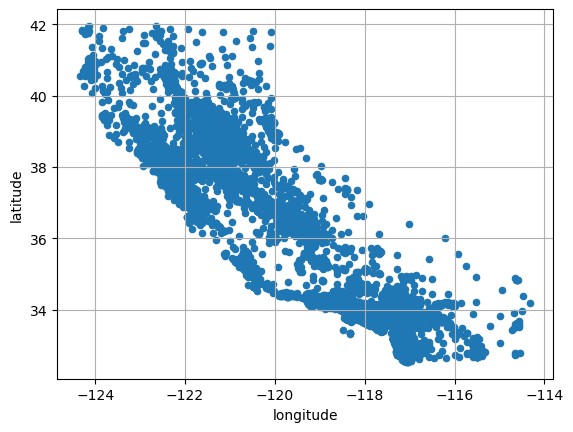

In [73]:
#It shows a map similar to california state but we cant see any patterm
housing.plot(kind = "scatter", x = "longitude" , y = "latitude" , grid = True)
plt.show()

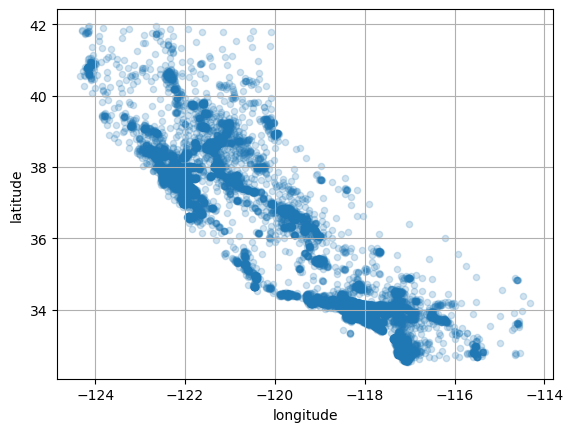

In [75]:
#Now we can see the pattern as we have reduceds the opacity of the datapoints so we can see the dense datapoints
housing.plot(kind = "scatter", x = "longitude" , y = "latitude" , grid = True,alpha =0.2)
plt.show()

In [ ]:
housing.plot(kind = "scatter", x = "longitude" , y = "latitude" , grid = True,alpha =0.2 , s = housing['population'], label = "population", c = "median_house")